# 导入工具包

In [1]:
import cv2
import mediapipe as mp

#进度条库
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

#使用ipython魔法方法，将绘制得到的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
#定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR。matplotlib可视化格式为RGB，因此需将BGR转化为RGB'''
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入手部关键点检测模型

In [3]:
#导入solution
mp_hands = mp.solutions.hands

#导入模型
hands = mp_hands.Hands(static_image_mode=False,       #是静态图片还是连续视频帧
                      max_num_hands=4,                #最多检测几只手
                      min_detection_confidence=0.5,   #置信度阈值
                      min_tracking_confidence=0.5,    #追踪阈值
                      )

#导入绘图函数
mpDraw = mp.solutions.drawing_utils

# 读入图像

In [4]:
#从图片文件夹读入图像，opencv读入格式为BGR格式

img = cv2.imread('./images/Camera1.jpg')

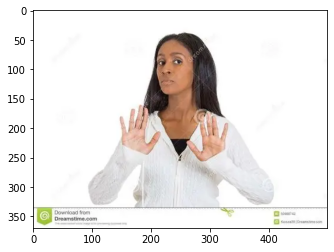

In [5]:
look_img(img)

In [6]:
# 水平镜像翻转图像，使得图中的左右手与真实左右手相对应
#参数，1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img,1)

# BGR转RGB
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGRA2RGB)

#将RGB图像输入模型。获取预测结果
results = hands.process(img_RGB)

# 分析模型输出结果
# 置信度和左右手

In [7]:
results.multi_handedness

[classification {
   index: 1
   score: 0.9950695633888245
   label: "Right"
 },
 classification {
   index: 0
   score: 1.0
   label: "Left"
 }]

#### 索引为0的手

In [8]:
results.multi_handedness[0].classification[0].score

0.9950695633888245

In [9]:
results.multi_handedness[0].classification[0].label

'Right'

#### 索引为1的手

In [10]:
results.multi_handedness[1].classification[0].score

1.0

In [11]:
results.multi_handedness[1].classification[0].label

'Left'

# 关键点坐标

In [12]:
len(results.multi_hand_landmarks)

2

In [13]:
#所有手的关键点坐标
results.multi_hand_landmarks

[landmark {
   x: 0.658461332321167
   y: 0.6480829119682312
   z: -1.820570651034359e-05
 }
 landmark {
   x: 0.6274071335792542
   y: 0.6424683928489685
   z: -0.028798945248126984
 }
 landmark {
   x: 0.6035823225975037
   y: 0.6227961778640747
   z: -0.05236710608005524
 }
 landmark {
   x: 0.5885063409805298
   y: 0.5959082841873169
   z: -0.07404224574565887
 }
 landmark {
   x: 0.5730107426643372
   y: 0.5718812346458435
   z: -0.09424512088298798
 }
 landmark {
   x: 0.6281157732009888
   y: 0.56601482629776
   z: -0.060900598764419556
 }
 landmark {
   x: 0.6218298673629761
   y: 0.5177469849586487
   z: -0.08988548070192337
 }
 landmark {
   x: 0.6164799928665161
   y: 0.4880814850330353
   z: -0.10952070355415344
 }
 landmark {
   x: 0.6126164197921753
   y: 0.4603215754032135
   z: -0.1209946870803833
 }
 landmark {
   x: 0.6473404765129089
   y: 0.5598850250244141
   z: -0.061188481748104095
 }
 landmark {
   x: 0.6398305892944336
   y: 0.5082675218582153
   z: -0.08969006

In [14]:
results.multi_hand_landmarks[0]

landmark {
  x: 0.658461332321167
  y: 0.6480829119682312
  z: -1.820570651034359e-05
}
landmark {
  x: 0.6274071335792542
  y: 0.6424683928489685
  z: -0.028798945248126984
}
landmark {
  x: 0.6035823225975037
  y: 0.6227961778640747
  z: -0.05236710608005524
}
landmark {
  x: 0.5885063409805298
  y: 0.5959082841873169
  z: -0.07404224574565887
}
landmark {
  x: 0.5730107426643372
  y: 0.5718812346458435
  z: -0.09424512088298798
}
landmark {
  x: 0.6281157732009888
  y: 0.56601482629776
  z: -0.060900598764419556
}
landmark {
  x: 0.6218298673629761
  y: 0.5177469849586487
  z: -0.08988548070192337
}
landmark {
  x: 0.6164799928665161
  y: 0.4880814850330353
  z: -0.10952070355415344
}
landmark {
  x: 0.6126164197921753
  y: 0.4603215754032135
  z: -0.1209946870803833
}
landmark {
  x: 0.6473404765129089
  y: 0.5598850250244141
  z: -0.061188481748104095
}
landmark {
  x: 0.6398305892944336
  y: 0.5082675218582153
  z: -0.08969006687402725
}
landmark {
  x: 0.634526252746582
  y: 0.4

#### 索引为1的手的第20号关键点的坐标

In [15]:
results.multi_hand_landmarks[1].landmark[20]

x: 0.3389323949813843
y: 0.5251125693321228
z: -0.09008722007274628

In [16]:
results.multi_hand_landmarks[1].landmark[20].x

0.3389323949813843

In [17]:
# 获取图像宽高
h,w = img.shape[0],img.shape[1]

In [18]:
h

370

In [19]:
w

500

In [20]:
results.multi_hand_landmarks[1].landmark[20].x * w

169.46619749069214

### 关键点之间的连接关系（骨架）

In [21]:
mp_hands.HAND_CONNECTIONS

frozenset({(<HandLandmark.WRIST: 0>, <HandLandmark.THUMB_CMC: 1>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.INDEX_FINGER_MCP: 5>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.PINKY_MCP: 17>),
           (<HandLandmark.THUMB_CMC: 1>, <HandLandmark.THUMB_MCP: 2>),
           (<HandLandmark.THUMB_MCP: 2>, <HandLandmark.THUMB_IP: 3>),
           (<HandLandmark.THUMB_IP: 3>, <HandLandmark.THUMB_TIP: 4>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.INDEX_FINGER_PIP: 6>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.MIDDLE_FINGER_MCP: 9>),
           (<HandLandmark.INDEX_FINGER_PIP: 6>,
            <HandLandmark.INDEX_FINGER_DIP: 7>),
           (<HandLandmark.INDEX_FINGER_DIP: 7>,
            <HandLandmark.INDEX_FINGER_TIP: 8>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.MIDDLE_FINGER_PIP: 10>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.RING_FINGER_MCP:

# 可视化结果

In [22]:
if results.multi_hand_landmarks:   #如果检测到手
    #遍历每一只检测出的手
    for hand_idx in range(len(results.multi_hand_landmarks)):
        hand_21 = results.multi_hand_landmarks[hand_idx]    #获取手的所有关键点坐标
        mpDraw.draw_landmarks(img,hand_21,connections = mp_hands.HAND_CONNECTIONS)

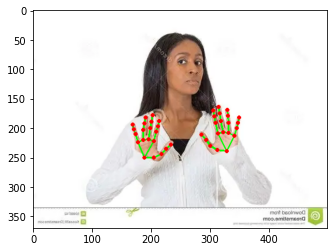

In [23]:
look_img(img)